$$ \frac{d}{dt}y(t) = \beta y(t)(1 - \frac{y(t)}{K_y}) $$

$$ y = K_y (1 + (\frac{K_y}{y_0} - 1) e^{-\beta t})^{-1}$$

In [135]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

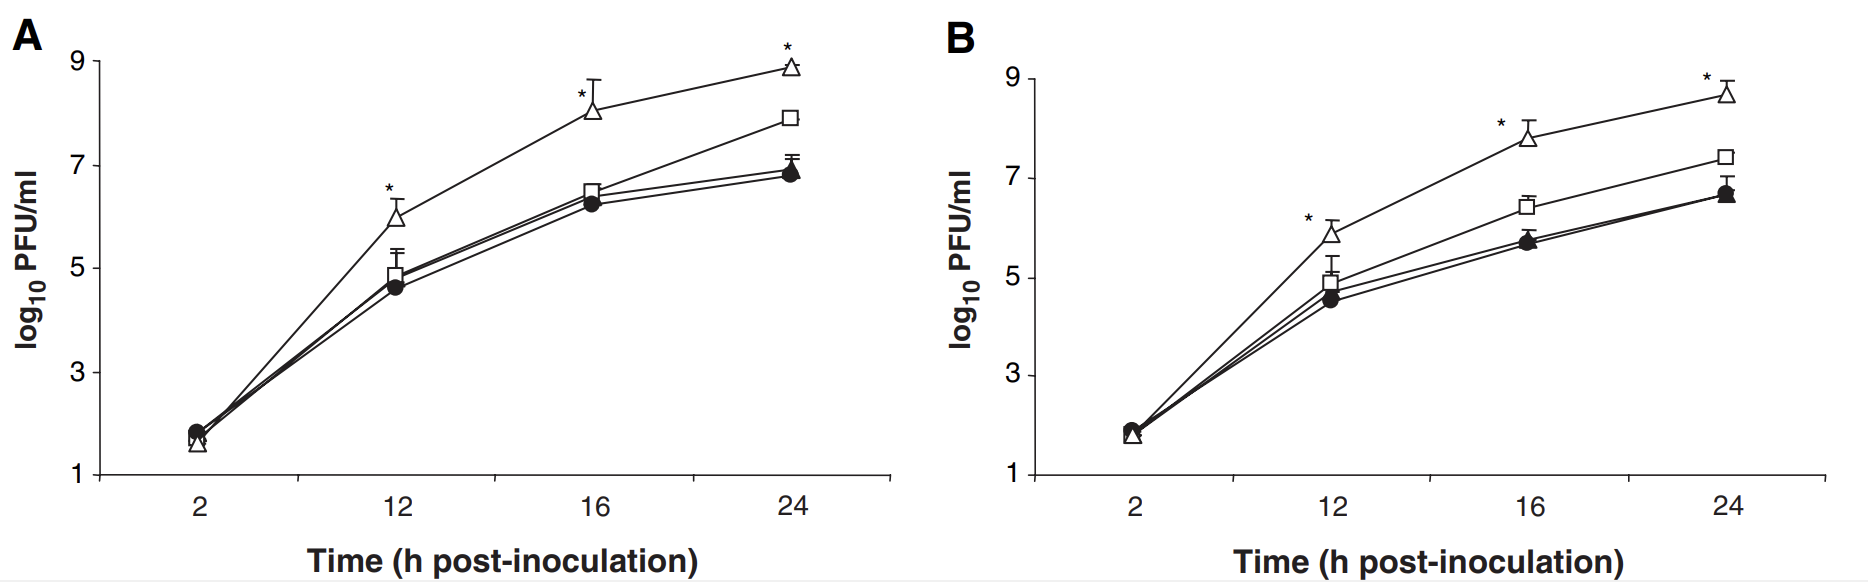

Release of 1918 influenza virus
from apically infected human bronchial
epithelial cells. Calu-3 cells were grown
to confluency on transwell inserts as
previously described (24). Cells were
infected with Tx/91 (r), Tx/91
HA:1918 (g), 1918 HA/NA/M/NP/
NS:Tx/91 (&), or 1918 (D) virus at an
MOI of 0.01 for 1 hour at 37-C.
Unbound virus was removed by washing the cells 3 times, and infected cells
were cultured in Dulbecco’s modified
Eagle’s medium (DMEM) medium supplemented with 0.3% bovine serum
albumin in the presence (A) or absence (B) of trypsin (1 mg/ml; Sigma, St. Louis,
MO). Apical and basolateral (not shown) supernatants were collected at the
indicated times and virus content was determined in a standard plaque assay.
The values shown represent the mean virus titer of fluids from three replicate
infected cultures. *The 1918 virus titers are significantly (P G 0.05) different from
those of all other virus infection groups as determined by analysis of variance.

In [136]:
t_list = np.array([2, 12.0, 16.0, 24.0])
y_list_1918_A = np.array([1.52985507659118e+000, 5.93914355996825e+000,8.00920945366260e+000,8.86142032772412e+000])
y_list_1918_B = np.array([1.76534, 5.8231, 7.77256, 8.66787])
y_list_HA1918_A = np.array([1.66821, 4.88715, 6.47281, 7.94787])
y_list_HA1918_B = np.array([1.85199, 4.89892, 6.3574, 7.41155])

In [137]:
def y_f(t, beta, K_y, y0):
    return K_y * (1 + (K_y / y0 - 1) * np.exp(-beta * t))**(-1)

In [138]:
def Phi(p, y_list, t_list):
    y0 = 10**y_list[0]
    t_list = t_list - t_list[0]
    [beta, K_y] = p
    return np.sum([(np.log10((y_f(t, beta, K_y, y0))) - y)**2 for (y, t) in zip(y_list[1:], t_list[1:])])

In [139]:
beta0 = 1
K_y0 = 10**y_list_1918_A[-1]
res_1918_A = scipy.optimize.minimize(Phi, [beta0, K_y0], (y_list_1918_A, t_list))
print(res_1918_A.x)

[1.05248796e+00 7.26809052e+08]


In [140]:
beta0 = 1
K_y0 = 10**y_list_1918_B[-1]
res_1918_B = scipy.optimize.minimize(Phi, [beta0, K_y0], (y_list_1918_B, t_list))
print(res_1918_B.x)

[9.73283980e-01 4.65446748e+08]


In [141]:
beta0 = 1
K_y0 = 10**y_list_HA1918_A[-1]
res_HA1918_A = scipy.optimize.minimize(Phi, [beta0, K_y0], (y_list_HA1918_A, t_list))
print(res_HA1918_A.x)

[7.75046382e-01 8.86890494e+07]


In [142]:
print(res_1918_A.x[0] / res_HA1918_A.x[0])

1.35796771257833


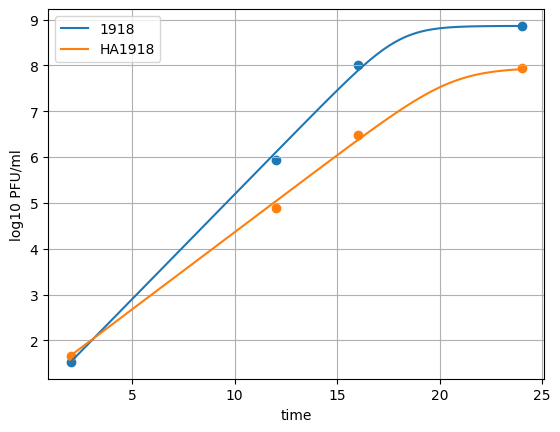

In [158]:
t = np.linspace(0, 22, 22)
[beta, K_y] = res_1918_A.x
y0 = 10**y_list_1918_A[0]
y = y_f(t, beta, K_y, y0)
log_y = np.log10(y)
plt.plot(t + t_list[0], log_y, label='1918')
plt.scatter(t_list, y_list_1918_A)

[beta, K_y] = res_HA1918_A.x
y0 = 10**y_list_HA1918_A[0]
y = y_f(t, beta, K_y, y0)
log_y = np.log10(y)
plt.plot(t + t_list[0], log_y, label='HA1918')
plt.scatter(t_list, y_list_HA1918_A)

plt.grid()
plt.title ('')
plt.xlabel('time')
plt.ylabel('log10 PFU/ml')
plt.legend()
plt.show()